In [1]:
import os
import shutil
import gensim
from official.nlp import optimization  # to create AdamW optimizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB,GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np



In [2]:
# Load the dataset
balanced_bl = pd.read_csv("balanced_processed_nostem.csv")

In [3]:
len(balanced_bl)

3836

In [4]:
balanced_bl['class'].value_counts()

False    1918
True     1918
Name: class, dtype: int64

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_bl['tokens'], balanced_bl['class'],random_state=0,test_size =0.3, stratify=balanced_bl['class'])

"""N/B : The "stratify" parameter is often used in machine learning algorithms to ensure that the training
and testing datasets have similar proportions of each class, which can be important for improving the accuracy
of the model. """

'N/B : The "stratify" parameter is often used in machine learning algorithms to ensure that the training\nand testing datasets have similar proportions of each class, which can be important for improving the accuracy\nof the model. '

# BUILD THE NLP/ML Pipeline

The code creates a pipeline which is defined using the Pipeline function from the sklearn.pipeline module,The pipeline consists of two main steps:

The first step is a data pre-processing step, where the TfidfVectorizer function is used to transform the raw text data into numerical features. This function converts each text document into a matrix of numerical values, which can be used as input to machine learning algorithms.

The second step is the machine learning algorithm, where the ML is used to train a model on the transformed data.

In [6]:
#SVM PIPELINE

clf_svm = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('svm', SVC(C=3000,gamma='auto'))         
])

In [7]:
#Decision Tree Pipeline
clf_dt = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Decision Tree', DecisionTreeClassifier())         
])

In [8]:
#Logistic Regression Pipeline
clf_lr = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('LR', LogisticRegression())         
      ])


In [9]:
#Random Forest Pipeline

clf_rf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])

In [10]:
#Multilayer perceptron Pipeline
clf_mlp = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('MultilayerPerceptronClassifier', MLPClassifier())
])
"""By default the number of hidden layers in the MLP is 1 with 100 nodes."""

'By default the number of hidden layers in the MLP is 1 with 100 nodes.'

In [11]:
#Gradient Boosting Tree Pipeline
clf_gbt = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Gradient Boosting', GradientBoostingClassifier())         
])

# TRAIN THE MODELS

In [12]:
#Training the SVM model
start_time = time()

clf_svm.fit(X_train, y_train)

end_time = time()

In [13]:
#Training the DT model
start_time_1 = time()

clf_dt.fit(X_train, y_train)

end_time_1 = time()

In [14]:
#Training the LR model
start_time_2 = time()
clf_lr.fit(X_train, y_train)

end_time_2 = time()

In [15]:
#Training the RF model
start_time_3 = time()
clf_rf.fit(X_train, y_train)

end_time_3 = time()

In [16]:
#Training the MLP model
start_time_4 = time()
clf_mlp.fit(X_train, y_train)

end_time_4 = time()

In [17]:
#Training the GBT model
start_time_5 = time()
clf_gbt.fit(X_train,y_train)

end_time_5 = time()

# Training Times

In [18]:
# Print the training time
print("Training time for SVM: %.2f seconds" % (end_time - start_time),'\n'
     "Training time for DT: %.2f seconds" % (end_time_1 - start_time_1),'\n',
     "Training time for LR: %.2f seconds" % (end_time_2 - start_time_2),'\n',
     "Training time for RF: %.2f seconds" % (end_time_3 - start_time_3),'\n',
     "Training time for MLP: %.2f seconds" % (end_time_4 - start_time_4),'\n',
     "Training time for GBT: %.2f seconds" % (end_time_5 - start_time_5))

Training time for SVM: 4.96 seconds 
Training time for DT: 2.02 seconds 
 Training time for LR: 1.92 seconds 
 Training time for RF: 5.93 seconds 
 Training time for MLP: 230.58 seconds 
 Training time for GBT: 15.46 seconds


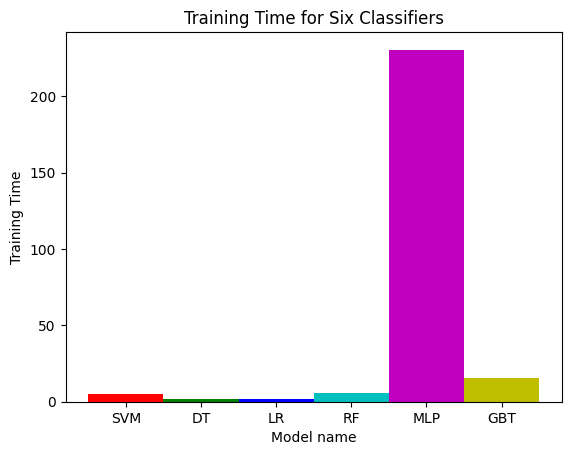

In [19]:
#Building a bar chart for the Training times

svm_time =end_time -start_time
dt_time = end_time_1 -start_time_1
lr_time =end_time_2 - start_time_2
rf_time =end_time_3 - start_time_3
mlp_time=end_time_4 - start_time_4
gbt_time =end_time_5 - start_time_5


time_model = {'SVM': [svm_time], 'DT': [dt_time], 'LR':[lr_time],'RF':[rf_time],'MLP':[mlp_time],'GBT':[gbt_time]}
colors= ['r', 'g', 'b', 'c', 'm', 'y']

# Plot histograms of evaluation metrics for SVM 
plt.bar(time_model.keys(),[i[0] for i in time_model.values()], color=colors, width=1)
plt.xlabel('Model name')
plt.ylabel('Training Time')
plt.title('Training Time for Six Classifiers')
plt.show()


In [20]:
"""Creating a table for the training times"""

data = {'Training Time': [svm_time, dt_time,lr_time,rf_time,mlp_time,gbt_time]
       }


# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data, index=['SVM', 'Decision Tree','Logistic Regression','RandomForest', 'Multilayer Perceptron','Gradient Boosting Tree'])

# Define a function to highlight the cell with the highest value in each row
def highlight_max(row):
    max_val = row.max()
    return ['background-color: green' if val == max_val else '' for val in row]

# Apply the function to each row of the dataframe
df_styled = df.style.apply(highlight_max, axis=0)

# Apply a background color to the header row
df_styled.set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2')]}
])

# Apply a different background color to the cells with the highest and lowest values
#df_styled.background_gradient(subset=pd.IndexSlice[:, ['Accuracy', 'Precision', 'Recall',F1-Score]], 
#                              cmap='RdYlGn', vmin=0, vmax=1)

# Add a title to the table
df_styled.set_caption('Training Time for TF-IDF with Six Classifiers for Enron + Nazario Balanced dataset')

# Render the styled table
display(df_styled)


,Training Time
SVM,4.958461
Decision Tree,2.015208
Logistic Regression,1.918174
RandomForest,5.928574
Multilayer Perceptron,230.576828
Gradient Boosting Tree,15.457357


# MAKE PREDICTIONS

In [21]:
#SVM Prediction
y_pred_svm = clf_svm.predict(X_test)
print(y_pred_svm)

[False False  True ...  True False False]


In [22]:
#Decision Tree Prediction
y_pred_dt = clf_dt.predict(X_test)
print(y_pred_dt)

[False False  True ...  True False False]


In [23]:
#Logistic Regression Prediction

y_pred_lr = clf_lr.predict(X_test)
print(y_pred_lr)

[False False  True ...  True False False]


In [24]:
#Random Forest Prediction

y_pred_rf = clf_rf.predict(X_test)
print(y_pred_rf)

[False False  True ...  True False False]


In [25]:
#MLP Prediction

y_pred_mlp = clf_mlp.predict(X_test)
print(y_pred_mlp)

[False False  True ...  True False False]


In [26]:
#Gradient Boosting Tree Prediction

y_pred_gbt = clf_gbt.predict(X_test)
print(y_pred_gbt)

[False False  True ...  True False False]


# COMPUTE THE EVALUATION METRICS
Compute accuracy,recall score, f1score and precision score


In [27]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_s = accuracy_score(y_test, y_pred_svm)
confusion_mat_s = confusion_matrix(y_test, y_pred_svm)
precision_s= precision_score(y_test, y_pred_svm, average='macro')
recall_s= recall_score(y_test, y_pred_svm, average='macro')
f1_score_s=f1_score(y_test, y_pred_svm, average='macro')
fpr_s = confusion_mat_s[0][1]/sum(confusion_mat_s[0])
fnr_s = confusion_mat_s[1,0] / (confusion_mat_s[1,0] + confusion_mat_s[1,1])

In [28]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_d = accuracy_score(y_test, y_pred_dt)
confusion_mat_d = confusion_matrix(y_test, y_pred_dt)
precision_d= precision_score(y_test, y_pred_dt, average='macro')
recall_d= recall_score(y_test, y_pred_dt, average='macro')
f1_score_d=f1_score(y_test, y_pred_dt, average='macro')
fpr_d = confusion_mat_d[0][1]/sum(confusion_mat_d[0])
fnr_d = confusion_mat_d[1,0] / (confusion_mat_d[1,0] + confusion_mat_d[1,1])

In [29]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)
precision_lr= precision_score(y_test, y_pred_lr, average='macro')
recall_lr= recall_score(y_test, y_pred_lr, average='macro')
f1_score_lr=f1_score(y_test, y_pred_lr, average='macro')
fpr_lr = confusion_mat_lr[0][1]/sum(confusion_mat_lr[0])
fnr_lr = confusion_mat_lr[1,0] / (confusion_mat_lr[1,0] + confusion_mat_lr[1,1])

In [30]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf= precision_score(y_test, y_pred_rf, average='macro')
recall_rf= recall_score(y_test, y_pred_rf, average='macro')
f1_score_rf=f1_score(y_test, y_pred_rf, average='macro')
fpr_rf = confusion_mat_rf[0][1]/sum(confusion_mat_rf[0])
fnr_rf = confusion_mat_rf[1,0] / (confusion_mat_rf[1,0] + confusion_mat_rf[1,1])

In [31]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
confusion_mat_mlp = confusion_matrix(y_test, y_pred_mlp)
precision_mlp= precision_score(y_test, y_pred_mlp, average='macro')
recall_mlp= recall_score(y_test, y_pred_mlp, average='macro')
f1_score_mlp=f1_score(y_test, y_pred_mlp, average='macro')
fpr_mlp = confusion_mat_mlp[0][1]/sum(confusion_mat_mlp[0])
fnr_mlp = confusion_mat_mlp[1,0] / (confusion_mat_mlp[1,0] + confusion_mat_mlp[1,1])

In [32]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_gbt = accuracy_score(y_test, y_pred_gbt)
confusion_mat_gbt = confusion_matrix(y_test, y_pred_gbt)
precision_gbt= precision_score(y_test, y_pred_gbt, average='macro')
recall_gbt= recall_score(y_test, y_pred_gbt, average='macro')
f1_score_gbt=f1_score(y_test, y_pred_gbt, average='macro')
fpr_gbt = confusion_mat_gbt[0][1]/sum(confusion_mat_gbt[0])
fnr_gbt = confusion_mat_gbt[1,0] / (confusion_mat_gbt[1,0] + confusion_mat_gbt[1,1])

# DISPLAY THE RESULTS
Display the results of the evaluation metrics on a table

In [33]:
# Print the accuracy,precision,recall, and f1score
print("Accuracy:", accuracy_s,accuracy_d,accuracy_lr,accuracy_rf,accuracy_mlp,accuracy_gbt)
print("Precision:",precision_s,precision_d,precision_lr,precision_rf,precision_mlp,precision_gbt)
print("Recall:", recall_s,recall_d,recall_lr,recall_rf,recall_mlp,recall_gbt)
print("f1-Score", f1_score_d,f1_score_lr,f1_score_rf,f1_score_mlp,f1_score_gbt)
print("False Positive Rate: ", fpr_s,fpr_d,fpr_lr,fpr_rf,fpr_mlp,fpr_gbt)
print("False Negative Rate: ", fnr_s,fnr_d,fnr_lr,fnr_rf,fnr_mlp,fnr_gbt)

Accuracy: 0.9704604691572546 0.950477845351868 0.9774109470026064 0.9826238053866203 0.9826238053866203 0.9661164205039097
Precision: 0.9710426869822844 0.950491865647306 0.9776268411449838 0.9827765864266513 0.9826499184733377 0.966751628176986
Recall: 0.9704453502415459 0.9504755434782608 0.9774018719806763 0.9826162439613526 0.9826207729468599 0.9661005434782608
f1-Score 0.9504772472514408 0.9774080650324013 0.9826222181960926 0.9826234774784568 0.966104037024368
False Positive Rate:  0.012152777777777778 0.046875 0.012152777777777778 0.008680555555555556 0.013888888888888888 0.015625
False Negative Rate:  0.04695652173913043 0.05217391304347826 0.03304347826086956 0.02608695652173913 0.020869565217391306 0.05217391304347826


In [34]:
# Create a dictionary of the metrics results
data = {'Accuracy': [accuracy_s, accuracy_d,accuracy_lr,accuracy_rf,accuracy_mlp,accuracy_gbt], 
        'Precision': [precision_s, precision_d,precision_lr,precision_rf,precision_mlp,precision_gbt], 
        'Recall': [recall_s, recall_d,recall_lr,recall_rf, recall_mlp,recall_gbt],
        'F1-Score':[f1_score_s,f1_score_d,f1_score_lr,f1_score_rf,f1_score_mlp,f1_score_gbt],
       'False Positive Rate':[fpr_s,fpr_d,fpr_lr,fpr_rf,fpr_mlp,fpr_gbt],
       'False Negative Rate':[fnr_s,fnr_d,fnr_lr,fnr_rf,fnr_mlp,fnr_gbt]}


# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data, index=['SVM', 'Decision Tree','Logistic Regression','RandomForest', 'Multilayer Perceptron','Gradient Boosting Tree'])

# Define a function to highlight the cell with the highest value in each row
def highlight_max(row):
    max_val = row.max()
    return ['background-color: green' if val == max_val else '' for val in row]

# Apply the function to each row of the dataframe
df_styled = df.style.apply(highlight_max, axis=0)

# Apply a background color to the header row
df_styled.set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2')]}
])

# Apply a different background color to the cells with the highest and lowest values
#df_styled.background_gradient(subset=pd.IndexSlice[:, ['Accuracy', 'Precision', 'Recall',F1-Score]], 
#                              cmap='RdYlGn', vmin=0, vmax=1)

# Add a title to the table
df_styled.set_caption('Results for TF-IDF with Six Classifiers for Enron + Nazario Balanced dataset')

# Render the styled table
display(df_styled)


,Accuracy,Precision,Recall,F1-Score,False Positive Rate,False Negative Rate
SVM,0.970460,0.971043,0.970445,0.970451,0.012153,0.046957
Decision Tree,0.950478,0.950492,0.950476,0.950477,0.046875,0.052174
Logistic Regression,0.977411,0.977627,0.977402,0.977408,0.012153,0.033043
RandomForest,0.982624,0.982777,0.982616,0.982622,0.008681,0.026087
Multilayer Perceptron,0.982624,0.982650,0.982621,0.982623,0.013889,0.020870
Gradient Boosting Tree,0.966116,0.966752,0.966101,0.966104,0.015625,0.052174


# Build a histogram of the Evaluation results

# DISPLAY THE CONFUSION MATRIX

"""The confusion matrix has two rows and two columns. The top row represents the predicted negative(Not Phishing) 
(0) and positive(Phishing) (1) classes, and the left column represents the true negative(Not Phishing) (0) and positive(Phishing) (1) classes.

The value in the top left corner represents the number of true negatives (TN), 
which are the cases that were predicted as negative (0) and were actually negative (0).

The value in the top right corner represents the number of false positives (FP), 
which are the cases that were predicted as positive (1)  but were actually negative (0).

The value in the bottom left corner represents the number of false negatives (FN), 
which are the cases that were predicted as negative (0) but were actually positive (1).

The value in the bottom right corner  represents the number of true positives (TP), 
which are the cases that were predicted as positive (1) and were actually positive (1).
"""

In [36]:
#Print Confusion Matrix
print("Confusion Matrix SVM:\n", confusion_mat_s,'\n',
     "Confusion Matrix DT:\n", confusion_mat_d,'\n',
     "Confusion Matrix LR:\n", confusion_mat_lr,'\n',
     "Confusion Matrix RF:\n", confusion_mat_rf,'\n',
     "Confusion Matrix MLP:\n", confusion_mat_mlp,'\n',
     "Confusion Matrix GBT:\n", confusion_mat_gbt)

Confusion Matrix SVM:
 [[569   7]
 [ 27 548]] 
 Confusion Matrix DT:
 [[549  27]
 [ 30 545]] 
 Confusion Matrix LR:
 [[569   7]
 [ 19 556]] 
 Confusion Matrix RF:
 [[571   5]
 [ 15 560]] 
 Confusion Matrix MLP:
 [[568   8]
 [ 12 563]] 
 Confusion Matrix GBT:
 [[567   9]
 [ 30 545]]


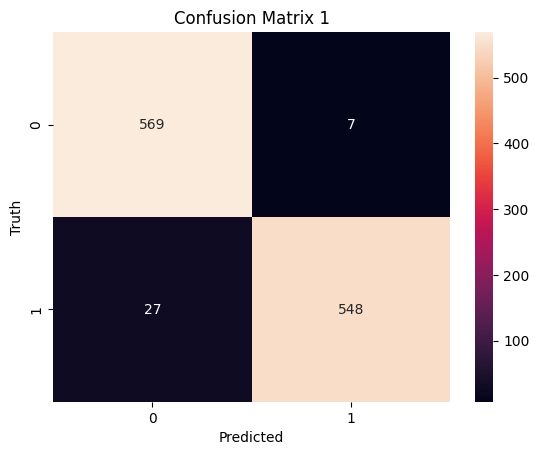

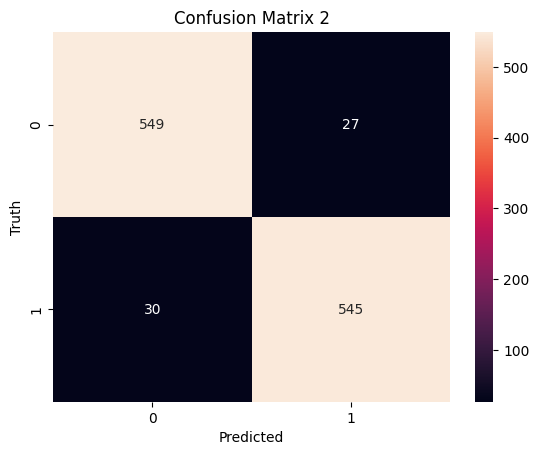

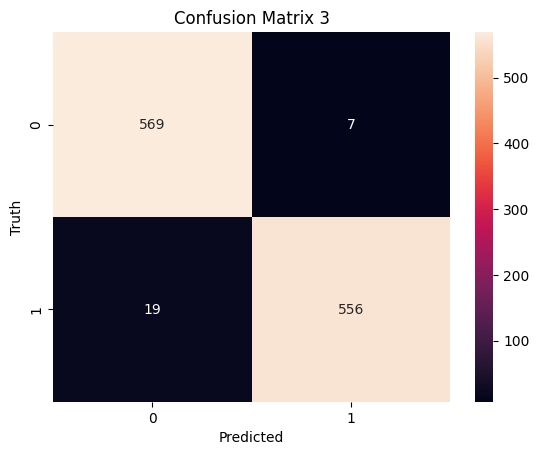

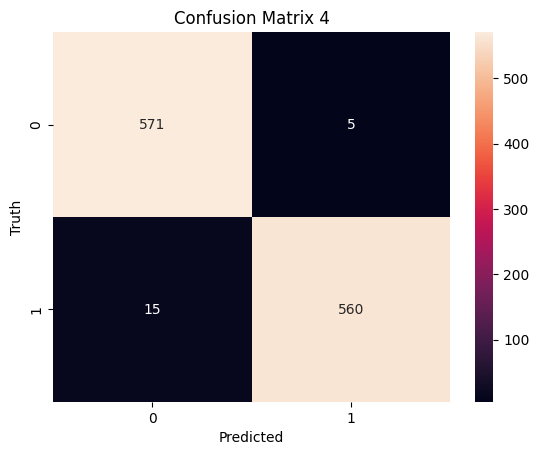

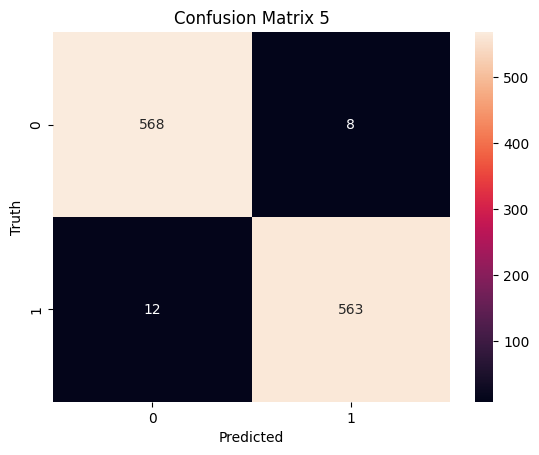

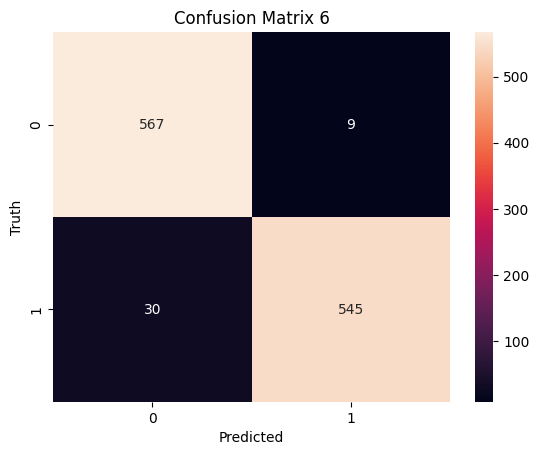

In [37]:
# Plot each confusion matrix using seaborn
for i, confusion_mat in enumerate([confusion_mat_s, confusion_mat_d, confusion_mat_lr,confusion_mat_rf,confusion_mat_mlp,confusion_mat_gbt]):
    plt.figure()
    plt.title(f"Confusion Matrix {i+1}")
    sn.heatmap(confusion_mat, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")

plt.show()

In [38]:
#Print Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_mlp, digits=2))

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       576
        True       0.99      0.98      0.98       575

    accuracy                           0.98      1151
   macro avg       0.98      0.98      0.98      1151
weighted avg       0.98      0.98      0.98      1151



# Test the model's peformance on a real text

In [39]:
clf_mlp.predict(["Hello Jose, your access will soon expire"])

array([ True])

In [40]:
clf_mlp.predict(['This is Emmanuel Omale'])

array([False])

In [41]:
clf_mlp.predict(["in the meantime you'll want to update your payment details."])

array([ True])